<a href="https://colab.research.google.com/github/andersod55123456789/Dales_code_box/blob/main/EmotionViz_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎵 EmotionViz (Colab)
A quick Colab runner for the **valence–arousal** visualizer.

In [1]:
# 1) Install dependencies (CPU PyTorch by default)
!pip -q install numpy scipy matplotlib librosa>=0.10.0 soundfile pyloudnorm torch

In [9]:
# 2) Upload the project zip you downloaded from ChatGPT (emotion_viz_learned.zip)
from google.colab import files
up = files.upload()  # choose emotion_viz_learned.zip


Saving emotion_viz.zip to emotion_viz (1).zip


In [10]:
# 3) Unzip into a folder
!rm -rf emotion_viz
!mkdir -p emotion_viz
!unzip -o /content/emotion_viz.zip -d emotion_viz > /dev/null
!ls -lah emotion_viz

total 28K
drwxr-xr-x 2 root root 4.0K Sep 12 21:38 .
drwxr-xr-x 1 root root 4.0K Sep 12 21:38 ..
-rw-r--r-- 1 root root  12K Sep 12 21:03 emotion_viz.py
-rw-r--r-- 1 root root 2.9K Sep 12 21:03 README.md
-rw-r--r-- 1 root root   60 Sep 12 21:03 requirements.txt


In [11]:
# 4) Install project requirements (librosa, pyloudnorm, etc.).
!pip -q install -r emotion_viz/requirements.txt

In [12]:
# 5) Upload an audio file to analyze (WAV/MP3/FLAC).
from google.colab import files
aud = files.upload()  # pick your audio file
audio_path = list(aud.keys())[0]
audio_path

Saving ACDC - TNT.mp3 to ACDC - TNT.mp3


'ACDC - TNT.mp3'

In [13]:
# (Optional) Upload a trained checkpoint to use the learned model.
from google.colab import files
print("Skip upload if you want heuristic only. If you have a checkpoint, upload it in the next prompt.")
ckpt = files.upload()  # can cancel if you don't have one
ckpt_path = list(ckpt.keys())[0] if len(ckpt) else None
ckpt_path

Skip upload if you want heuristic only. If you have a checkpoint, upload it in the next prompt.


In [14]:
# 6) Run EmotionViz (heuristic only if no checkpoint was uploaded; otherwise learned+blend).
import shlex, subprocess, os, sys

outdir = "outputs"
os.makedirs(outdir, exist_ok=True)

cmd = [
    sys.executable, "emotion_viz/emotion_viz.py",
    audio_path, "--outdir", outdir,
    "--win_seconds", "1.5",
]

if ckpt_path:
    cmd += ["--model_checkpoint", ckpt_path, "--blend", "1.0", "--device", "auto"]

print("Running:", " ".join(shlex.quote(c) for c in cmd))
subprocess.run(cmd, check=True)
print("Done.")

Running: /usr/bin/python3 emotion_viz/emotion_viz.py 'ACDC - TNT.mp3' --outdir outputs --win_seconds 1.5
Done.


outputs/ACDC - TNT_va_timeseries.png


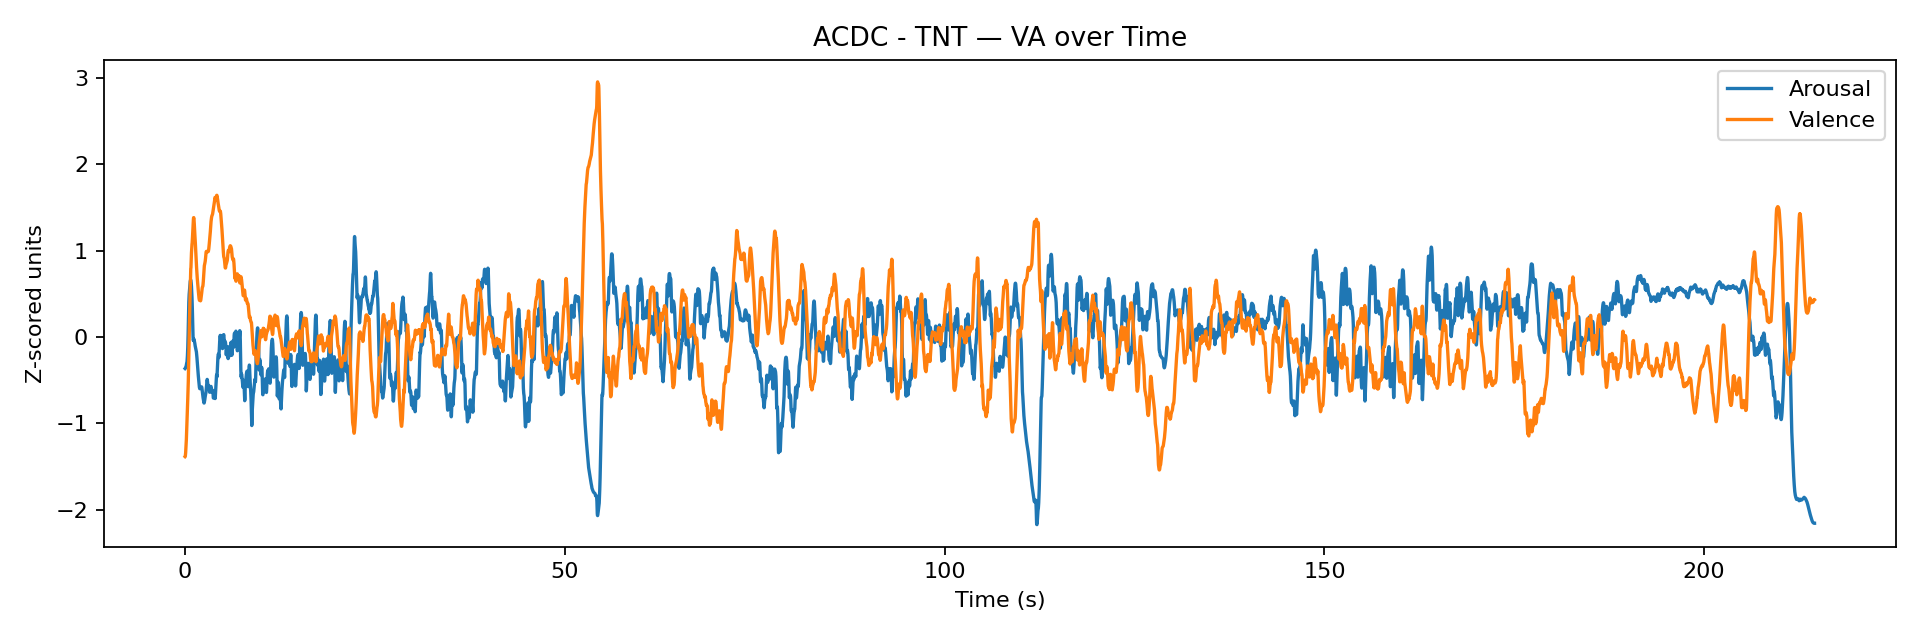

outputs/ACDC - TNT_va_trajectory.png


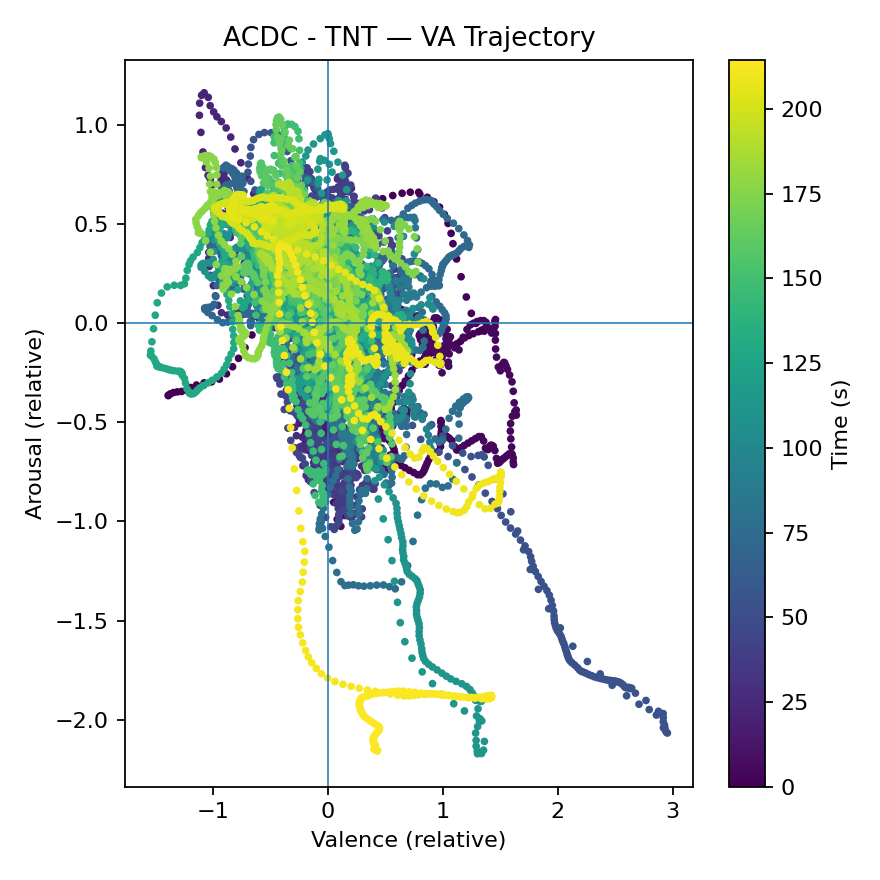

outputs/ACDC - TNT_melspec_va.png


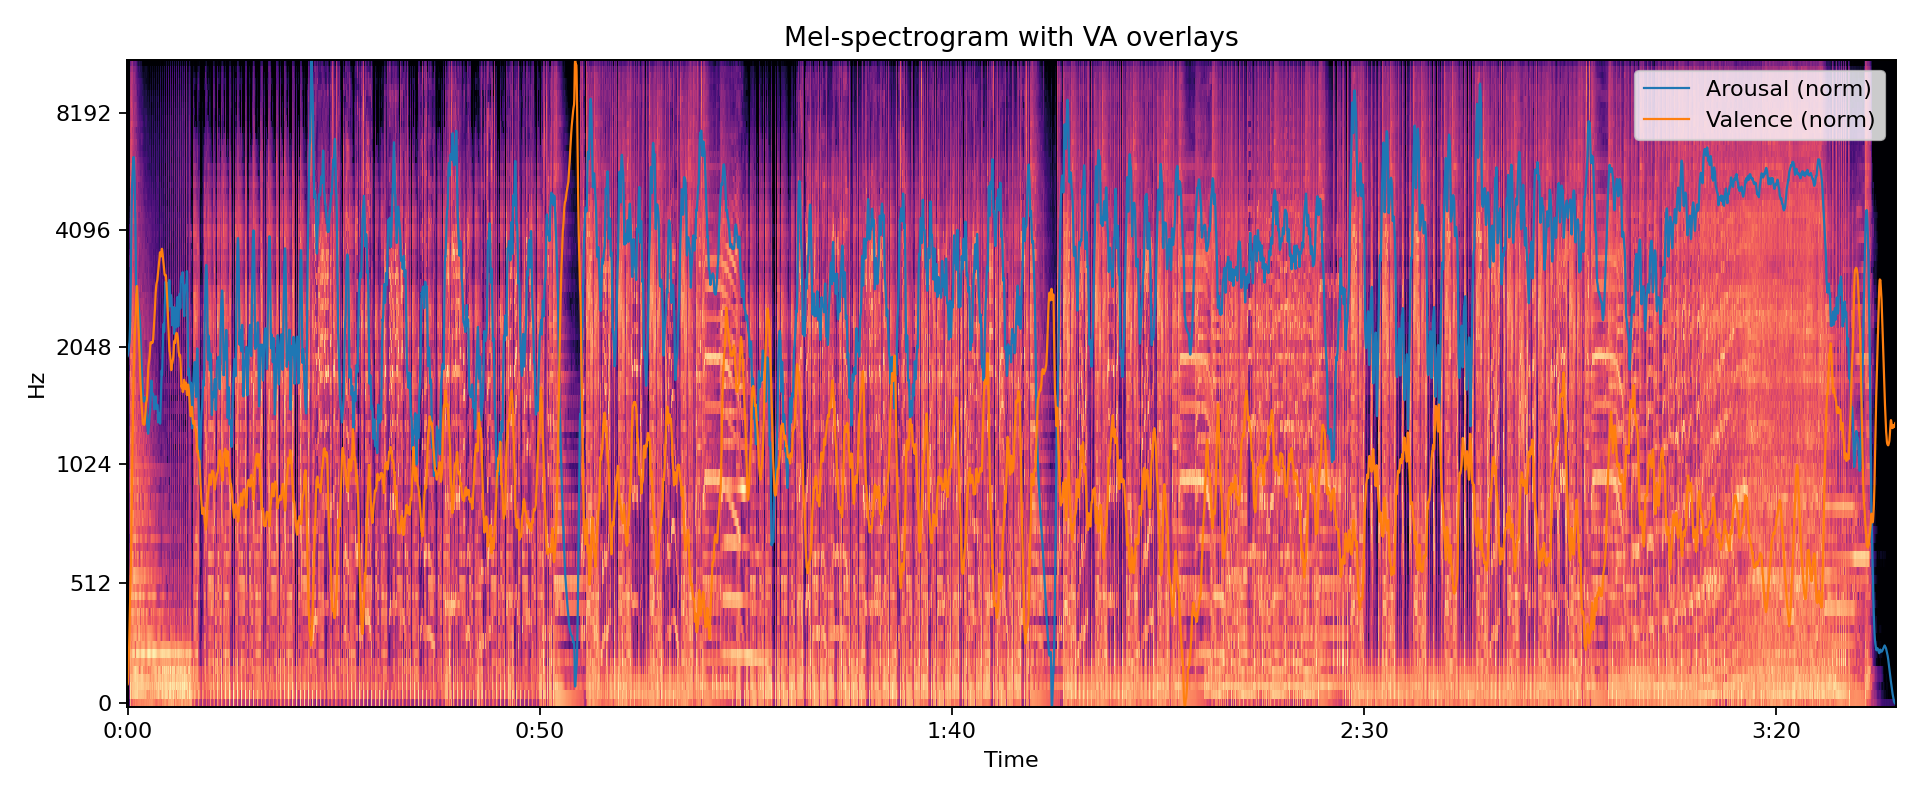

CSV files:
 - outputs/ACDC - TNT_va.csv


In [15]:
# 7) Preview outputs inline
import glob
from IPython.display import Image, display

for p in sorted(glob.glob("outputs/*_va_timeseries.png")) +          sorted(glob.glob("outputs/*_va_trajectory.png")) +          sorted(glob.glob("outputs/*_melspec_va.png")):
    print(p)
    display(Image(filename=p))

print("CSV files:")
for p in sorted(glob.glob("outputs/*_va.csv")):
    print(" -", p)

In [17]:
# Upload a new audio file to analyze (WAV/MP3/FLAC).
from google.colab import files
aud = files.upload()  # pick your audio file
audio_path = list(aud.keys())[0]
audio_path

Saving Enya - May it be.mp3 to Enya - May it be.mp3


'Enya - May it be.mp3'

In [18]:
# 6) Run EmotionViz (heuristic only if no checkpoint was uploaded; otherwise learned+blend).
import shlex, subprocess, os, sys

outdir = "outputs"
os.makedirs(outdir, exist_ok=True)

cmd = [
    sys.executable, "emotion_viz/emotion_viz.py",
    audio_path, "--outdir", outdir,
    "--win_seconds", "1.5",
]

if ckpt_path:
    cmd += ["--model_checkpoint", ckpt_path, "--blend", "1.0", "--device", "auto"]

print("Running:", " ".join(shlex.quote(c) for c in cmd))
subprocess.run(cmd, check=True)
print("Done.")

Running: /usr/bin/python3 emotion_viz/emotion_viz.py 'Enya - May it be.mp3' --outdir outputs --win_seconds 1.5
Done.


outputs/ACDC - TNT_va_timeseries.png


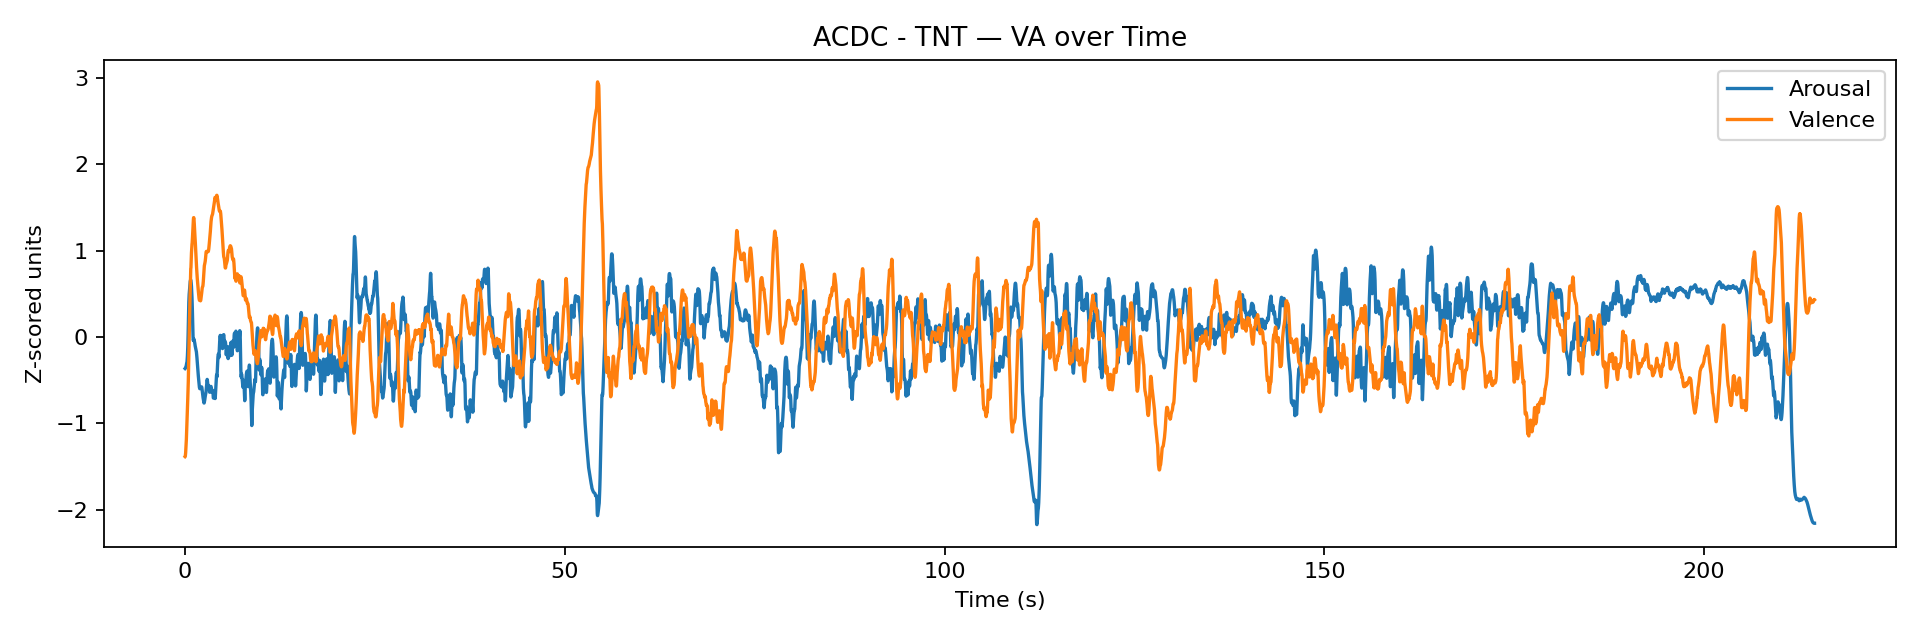

outputs/Enya - May it be_va_timeseries.png


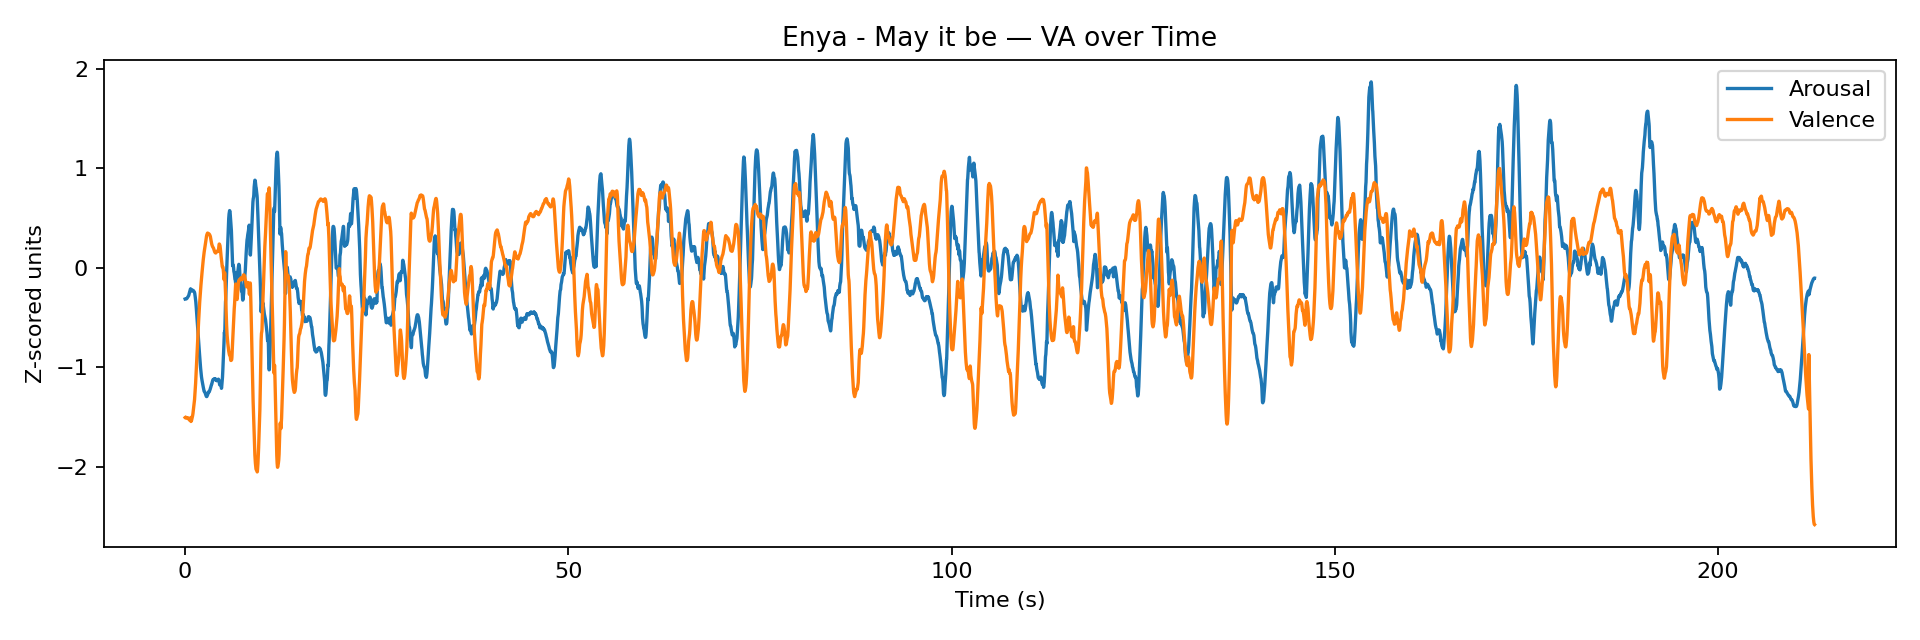

outputs/ACDC - TNT_va_trajectory.png


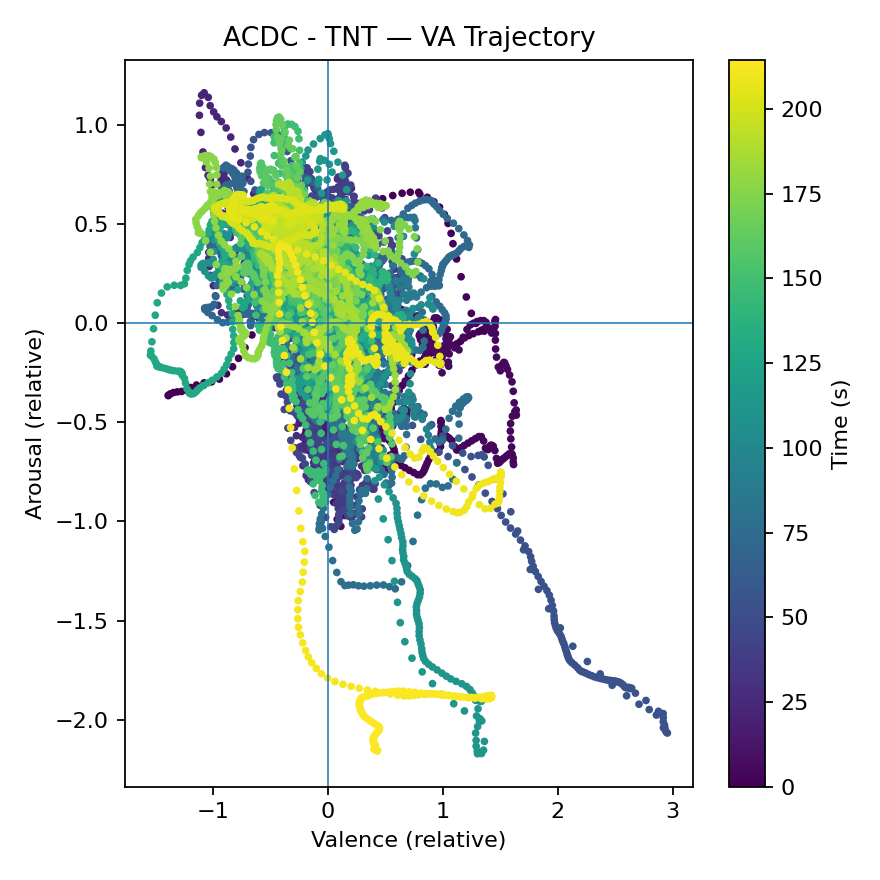

outputs/Enya - May it be_va_trajectory.png


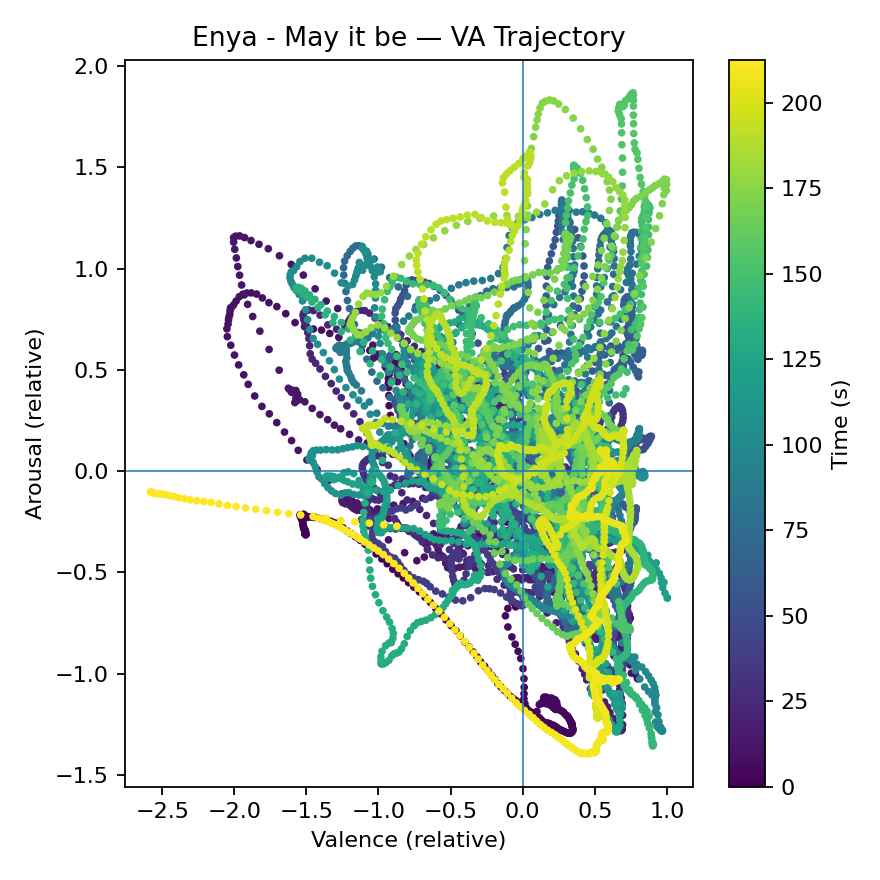

outputs/ACDC - TNT_melspec_va.png


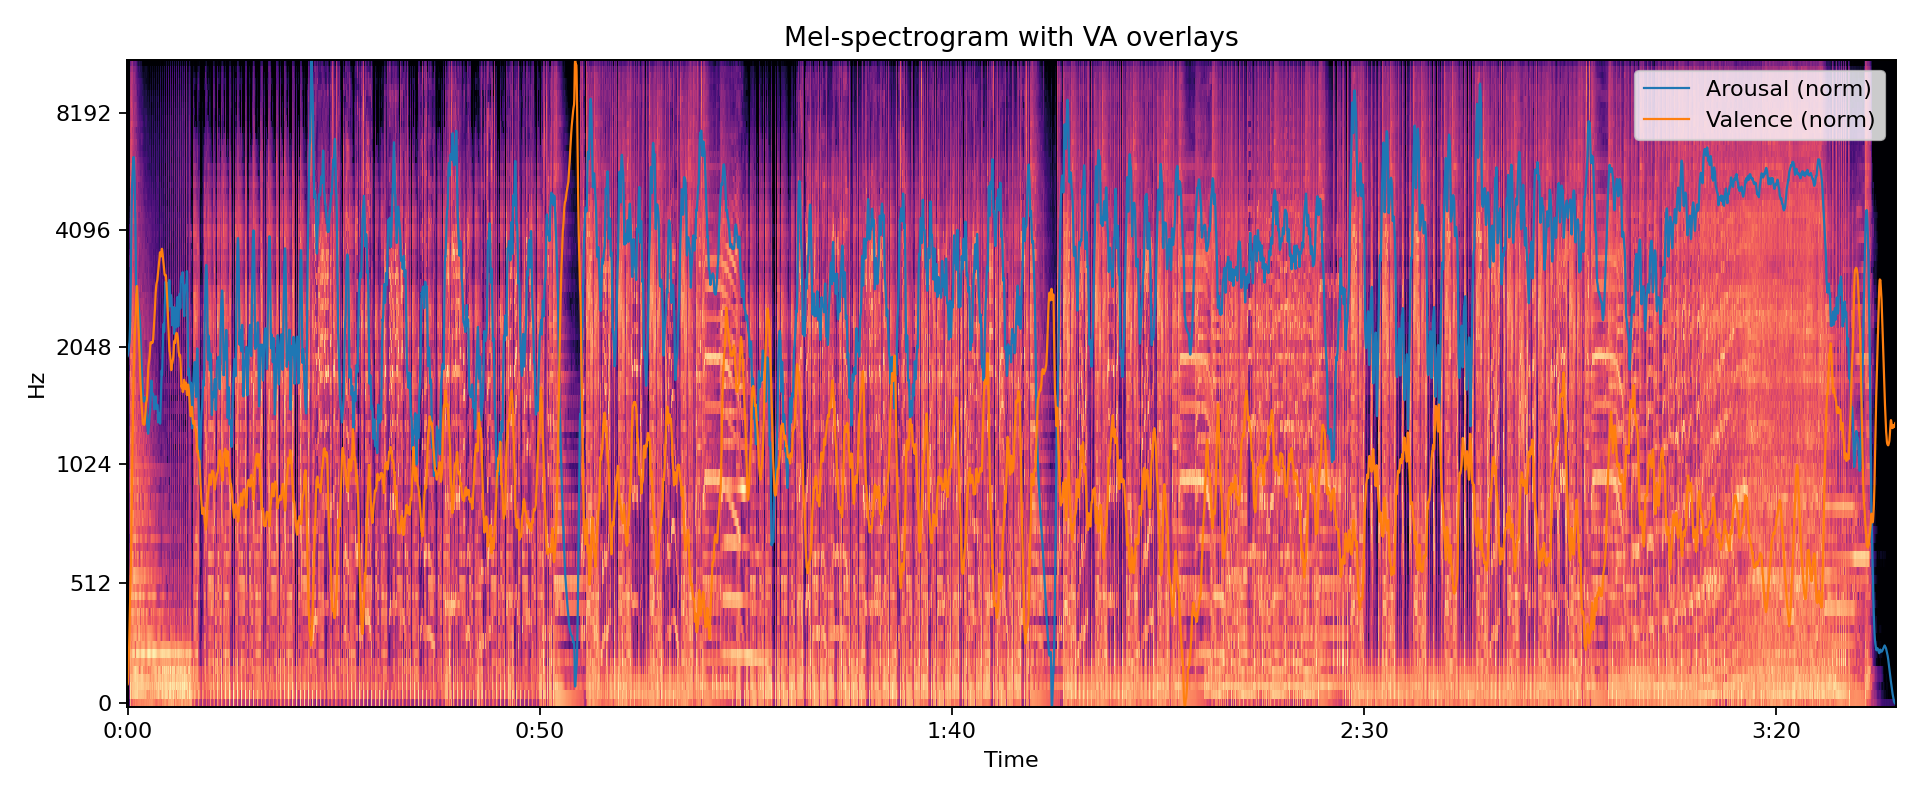

outputs/Enya - May it be_melspec_va.png


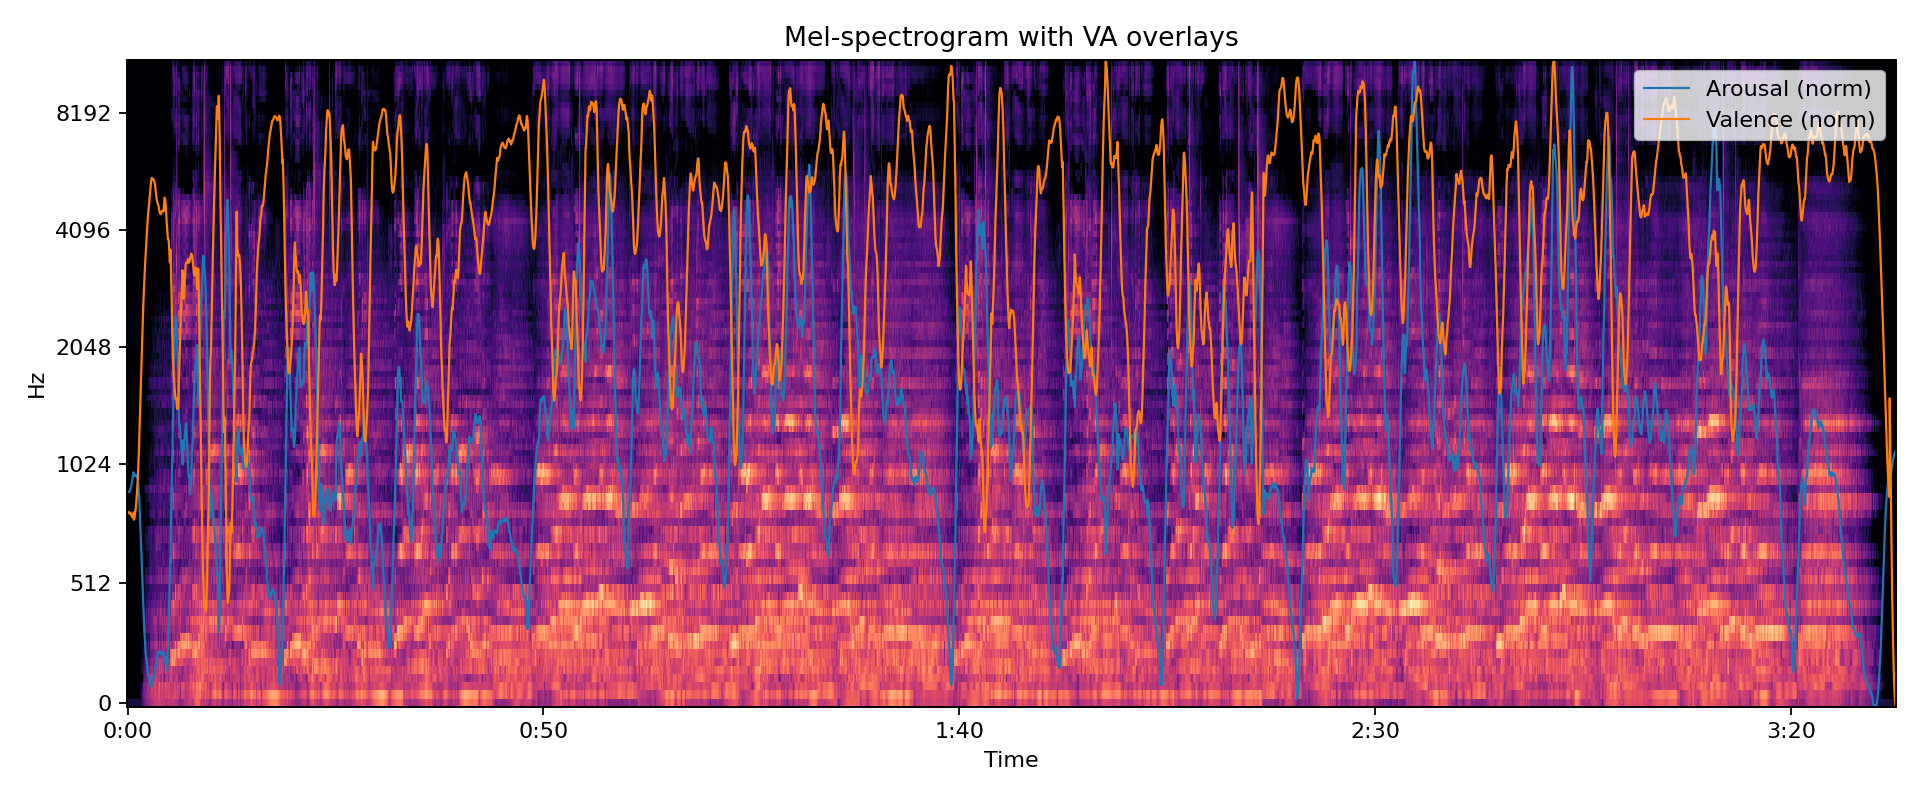

CSV files:
 - outputs/ACDC - TNT_va.csv
 - outputs/Enya - May it be_va.csv


In [19]:
# 7) Preview outputs inline
import glob
from IPython.display import Image, display

for p in sorted(glob.glob("outputs/*_va_timeseries.png")) +          sorted(glob.glob("outputs/*_va_trajectory.png")) +          sorted(glob.glob("outputs/*_melspec_va.png")):
    print(p)
    display(Image(filename=p))

print("CSV files:")
for p in sorted(glob.glob("outputs/*_va.csv")):
    print(" -", p)